<a href="https://colab.research.google.com/github/sahug/ds-nlp/blob/main/NLP%20-%20Session%2012%20-%20Keras%20-%20LSTM%20-%20Automatic%20Text%20Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP - Session 12 - Keras - LSTM - Automatic Text Generation**

#### Automatic Text Generation
Automatic text generation is the generation of natural language texts by computer. It has applications in automatic documentation systems, automatic letter writing, automatic report generation, etc. In this project, we are going to generate words given a set of input words. We are going to train the LSTM model using William Shakespeare’s writings. 


The dataset is available https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt.

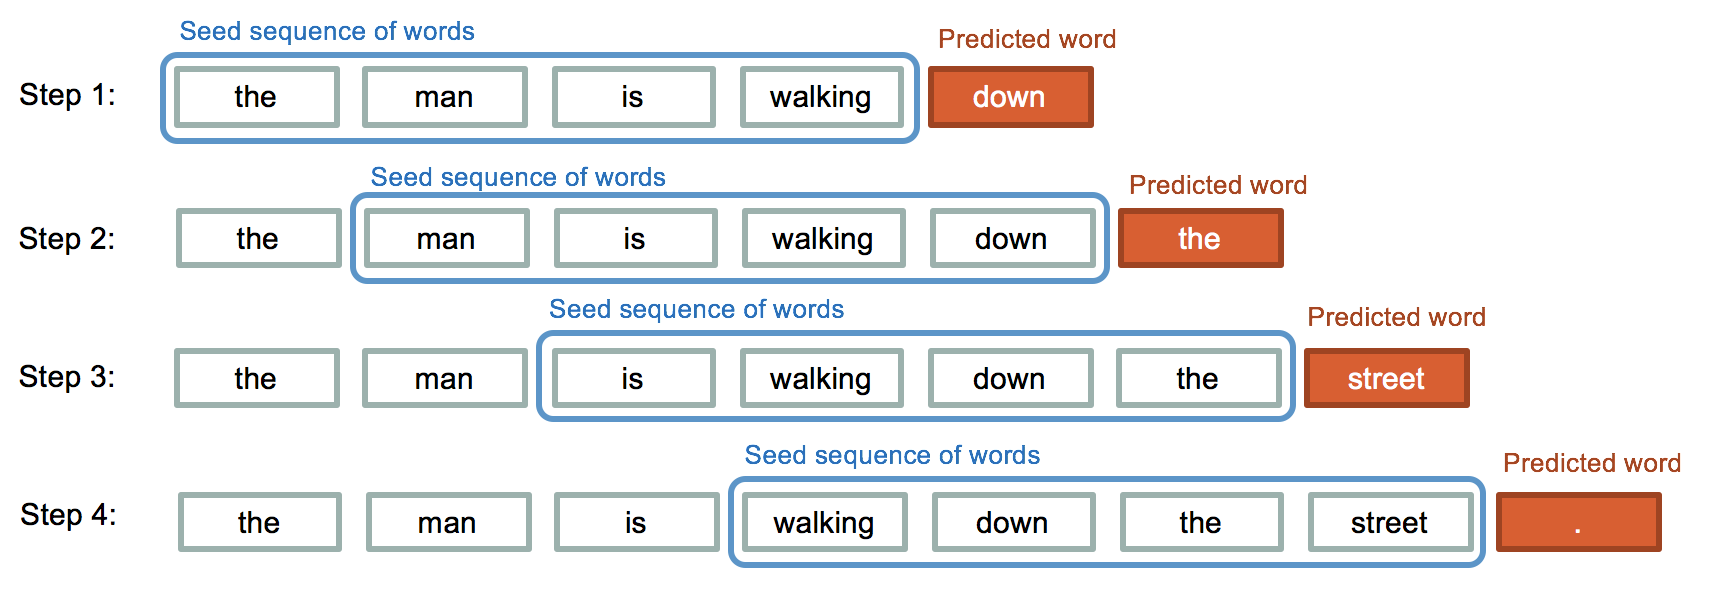

#### LSTM
 - Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory.
 - Generally LSTM is composed of a cell (the memory part of the LSTM unit) and three “regulators”, usually called gates, of the flow of information inside the LSTM unit: an input gate, an output gate and a forget gate.
 - Intuitively, the cell is responsible for keeping track of the dependencies between the elements in the input sequence.
 - The input gate controls the extent to which a new value flows into the cell, the forget gate controls the extent to which a value remains in the cell and the output gate controls the extent to which the value in the cell is used to compute the output activation of the LSTM unit.
 - The activation function of the LSTM gates is often the logistic sigmoid function.
 - There are connections into and out of the LSTM gates, a few of which are recurrent. The weights of these connections, which need to be learned during training, determine how the gates operate.
 
Here we are importing the necessary libraries:-

 - We have used a command to select the tensorflow version as 2.x
 - We have imported tensorflow to build the model.
 - We have imported string to get set of punctuations.
 - We have imported requests to get the data file in the notebook.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import string
import requests

The `get()` method sends a GET request to the specified url. Here we are sending a request to get the text document of the data.

In [ ]:
response = requests.get("https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt")

In [ ]:
response.text

Now we will display some part of the text returned by `requests.get()`.

You can see the character \n in the text. \n means `“newline”`. Now we are going to split the text with respect to \n.

In [ ]:
data = response.text.split("\n")
data[0]

The text file contains a header file before the actual data begins. The actual data begins from line 253. So we are going to slice the data and retain everything from line 253 onwards.

In [ ]:
data = data[253:]

In [ ]:
data[0]

In [ ]:
len(data)

Right now we have a list of the lines in the data. Now we are going to join all the lines and create a long string consisting of the data in continuous format.

In [ ]:
data = " ".join(data)
data

You can see that the data consists of various punctuation marks. We are going to create a function `clean_text()` to remove all the punctuation marks and special characters from the data.

We will split the data according to space character and separate each word using `split()`.

`maketrans() `function is used to construct the transition table i.e specify the list of characters that need to be replaced in the whole string or the characters that need to be deleted from the string. The first parameter specifies the list of characters that need to be replaced, the second parameter specifies the list of characters with which the characters need to be replaced, the third parameter specifies the list of characters that needs to be deleted.It returns the translation table which specifies the conversions that can be used by `translate()`.

string.punctuation is a pre-initialized string used as string constant which will give all the sets of punctuation.

To translate the characters in the string `translate()` is used to make the translations. This function uses the translation mapping specified using the maketrans().

The isalpha() method returns True if all the characters are alphabet letters (a-z). The `lower() `methods returns the lowercased string from the given string.

We can see that after passing data to `clean_text()` we get the data in the required format without punctuations and special characters.

In [ ]:
def clean_text(doc):
  tokens = doc.split()
  table = str.maketrans("", "", string.punctuation)
  tokens = [w.translate(table) for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [word.lower() for word in tokens]
  return tokens

In [ ]:
tokens = clean_text(data)
print(tokens[:50])

In [ ]:
len(tokens)

In [ ]:
len(set(tokens))

As discussed before we are going to use a set of previous words to predict the next word in the sentence. To be precise we are going to use a set of 50 words to predict the 51st word. Hence we are going to divide our data in chunks of 51 words and at the last we will separate the last word from every line. We are going to limit our dataset to 200000 words.

In [ ]:
length = 50 + 1
lines = []

for i in range(length, len(tokens)):
  seq = tokens[i-length:i]
  line = " ".join(seq)
  lines.append(line)
  if i>200000:
    break

print(len(lines))

Now we will see the first line consisting of 51 words.

In [ ]:
lines[0]

This is the second line consisting of 51 words. As you can see we have hopped by one word. The 51st word in this line is `'thy'` which will the output word used for prediction.

In [ ]:
lines[1]

The 51st word in this line is `'self'` which will the output word used for prediction.

In [ ]:
tokens[0], tokens[50]

## Build LSTM Model and Prepare X and y
Here we have imported all the necessary libraries used to pre-process the data and create the layers of the neural network.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

We are going to create a unique numerical token for each unique word in the dataset. `fit_on_texts()` updates internal vocabulary based on a list of texts. `texts_to_sequences()` transforms each text in texts to a sequence of integers.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

`sequences` containes a list of integer values created by `tokenizer`. Each line in `sequences` has 51 words. Now we will split each line such that the first 50 words are in X and the last word is in `y`.

In [ ]:
sequences = np.array(sequences)
X, y = sequences[:, :-1], sequences[:,-1]
X[0]

`vocab_size` contains all the uniques words in the dataset. `tokenizer.word_index` gives the mapping of each unique word to its numerical equivalent. Hence `len()` of `tokenizer.word_index` gives the `vocab_size`.

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

`to_categorical()` converts a class vector (integers) to binary class matrix. `num_classes` is the total number of classes which is `vocab_size`.

In [ ]:
y = to_categorical(y, num_classes=vocab_size)

The length of each sequence in X is 50.

In [ ]:
seq_length = X.shape[1]
seq_length

# LSTM Model
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

# Embedding layer:
The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset. It requires 3 arguments:

 - `input_dim`: This is the size of the vocabulary in the text data which is vocab_size in this case.
 - `output_dim`: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word.
 - `input_length`: Length of input sequences which is seq_length.

# LSTM layer:
This is the main layer of the model. It learns long-term dependencies between time steps in time series and sequence data. return_sequence when set to True returns the full sequence as the output.

# Dense layer:
Dense layer is the regular deeply connected neural network layer. It is the most common and frequently used layer. The rectified linear activation function or relu for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

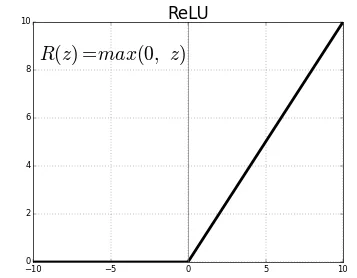

The last layer is also a dense layer with 13009 neurons because we have to predict the probabilties of 13009 words. The activation function used is softmax. Softmax converts a real vector to a vector of categorical probabilities. The elements of the output vector are in range (0, 1) and sum to 1.

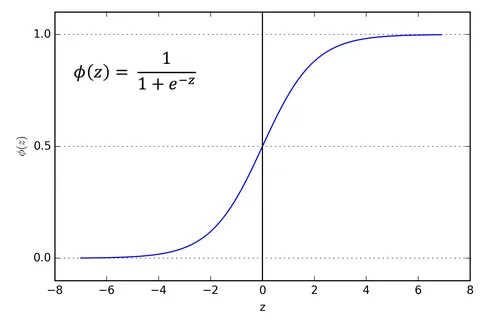

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

After compiling the model we will now train the model using `model.fit()` on the training dataset. We will use 100 epochs to train the model. An `epoch` is an iteration over the entire x and y data provided. `batch_size` is the number of samples per gradient update i.e. the weights will be updates after 256 training examples.

In [ ]:
model.fit(X, y, batch_size = 256, epochs = 100)

We are now going to generate words using the model. For this we need a set of 50 words to predict the 51st word. So we are taking a random line.

In [ ]:
seed_text=lines[12343]
seed_text

`generate_text_seq()` generates `n_words` number of words after the given `seed_text`. We are going to pre-process the seed_text before predicting. We are going to encode the `seed_text` using the same encoding used for encoding the training data. Then we are going to convert the `seed_text` to 50 words by using `pad_sequences()`. Now we will predict using model.predict_classes(). After that we will search the word in `tokenizer` using the index in `y_predict`. Finally we will append the predicted word to `seed_text` and `text` and repeat the process.

In [ ]:
def generate_text_seq(model, tokenizer, text_seq_length, seed_text, n_words):
  text = []

  for _ in range(n_words):
    encoded = tokenizer.texts_to_sequences([seed_text])[0]
    encoded = pad_sequences([encoded], maxlen = text_seq_length, truncating='pre')

    y_predict = model.predict_classes(encoded)

    predicted_word = ''
    for word, index in tokenizer.word_index.items():
      if index == y_predict:
        predicted_word = word
        break
    seed_text = seed_text + ' ' + predicted_word
    text.append(predicted_word)
  return ' '.join(text)

We can see that the next 100 words are predicted by the model for the seed_text.

In [ ]:
generate_text_seq(model, tokenizer, seq_length, seed_text, 100)


We have got a accuracy of 46%. To increase the accuracy we can increase the number of epochs or we can consider the entire data for training. For this model we have only considered 1/4th of the data for training.